<a href="https://colab.research.google.com/github/ryan-keenan/Data-C4/blob/master/Probability_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python exercises for probability distributions

## Learning objectives
1. Simulate a binary experiment.
2. Run a series of binary experiment simulations and compare the result with the probability associated with a specific number of successful outcomes computed using the binomial distribution.
2. Simulate an experiment to find the probability associated with the number of trials to reach the first success and compare with the result computed using the geometric distribution.
4. Simulate the probability of recording a given number of events in an interval or region and compare the result with the probability computed directly using the Poisson distribution.

**Step 0:** Import Python packages

In [0]:
# Import required packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
# Set up seaborn dark view
sns.set()

### **Learning objective 1:** Simulate a binary experiment.
**Step 1:** Define function that conducts a single Bernouilli trial.

In [2]:
# Define a function called "bernouilli_trial" that takes a variable "prob_of_success" indicating the probability of a successful outcome.
def bernouilli_trial(prob_of_success=0.5):
  # Choose a random number between 0 and 1
  result = np.random.random_sample()
  # If the result is less than or equal to the probability of success, declare a successful outcome
  if result <= prob_of_success:
    outcome = 'success'
  # Otherwise declare a failure
  else:
    outcome = 'failure'
  # Return the outcome
  return outcome

# Run the new function to test
bernouilli_trial()

'success'

**Step 2:** Run multiple Bernouilli trials and record the result 

In [3]:
# Define a function to run multiple Bernouilli trials
def binary_experiment(trials=10, p_of_success=0.5):
  # Initialize a list to store all the outcomes
  outcomes = []
  # Run through a loop to perform each Bernouilli trial and record each outcome
  for i in range(trials):
    outcome = bernouilli_trial(prob_of_success=p_of_success)
    outcomes.append(outcome)
  # Return the resulting list of outcomes
  return outcomes

# Run the new function to test
binary_experiment()

['failure',
 'success',
 'failure',
 'failure',
 'failure',
 'failure',
 'success',
 'failure',
 'failure',
 'success']

### **Learning objective 2:** Run a series of binary experiment simulations and compare the result with the probability associated with a specific number of successful outcomes computed using the binomial distribution.
**Step 1:** Write a function to run the binary experiment multiple times to simulate a binomial distribution.

In [4]:
# Define a new function to run multiple binary experiments
def multiple_experiments(experiments=10, trials=100, success=0.5):
  # Initialize a list to store the number of successful outcomes in each experiment
  n_success = []
  # Run through a loop to conduct each experiment and record the outcome
  for i in range(experiments):
    outcomes = binary_experiment(trials=trials, p_of_success=success)
    n_success.append(len([s for s in outcomes if s == 'success']))
  # Return the list of the number of successful outcomes in each experiment
  return n_success

# Run the new function to test
multiple_experiments()

[42, 52, 46, 53, 52, 47, 44, 54, 54, 46]

**Step 2:** Plot up a histogram of the result of running multiple binary experiments and compare with the theoretical result computed using the binomial distribution.

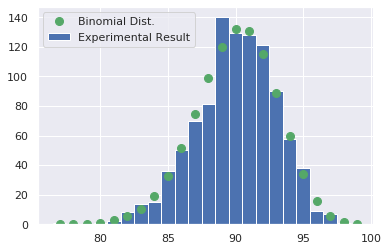

In [51]:
# Define the number of trials, probability of success, and number of experiments to run
num_trials = 100
p_success = 0.9
num_experiments = 1000
# Run binary experiments using the parameters defined above
n_success = multiple_experiments(experiments=num_experiments, 
                                 trials=num_trials, 
                                 success=p_success)
# Generate x-values to use in calculating a theoretical geometric distribution
x = np.arange(np.min(n_success), np.max(n_success)+1)
# Use the x-values to define bins to be used for a histogram of experimental data
bin_edges = x - 0.5
# Compute and plot a histogram of experimental results (blue bars)
plt.hist(n_success, bins=bin_edges, label='Experimental Result')
# Plot the theoretical result from a binomial distribution (green dots)
plt.plot(x, stats.binom.pmf(x, num_trials, p_success)*num_experiments, 'go', ms=8, label='Binomial Dist.')
plt.legend()
plt.show()

**Step 3:** Compare the result of running multiple binary experiments with the theoretical result computed using the binomial distribution for a specified range of values.

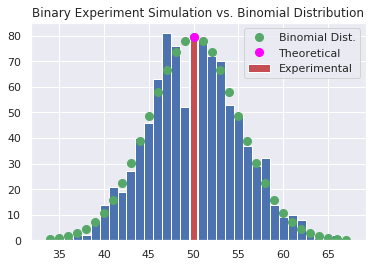

The experimental probability of n successes equal to 50 is 0.079
The theoretical probability of n successes equal to 50 is 0.080


In [108]:
# Write a function to compare an experimental result for some number of successes
# with the theoretical result from a binomial distribution
def compare_n_successes(n_to_compare=50, comparison='equal', experiments=1000, trials=100, success=0.5):
  # Run binary experiments
  n_success = multiple_experiments(experiments=experiments, 
                                 trials=trials, 
                                 success=success)
  # Generate x-values to use in calculating a theoretical geometric distribution
  x = np.arange(np.min(n_success), np.max(n_success)+1)
  # Use the x-values to define bins to be used for a histogram of experimental data
  bin_edges = np.append(x-0.5, x[-1]+0.5)
  # Compute and plot a histogram of experimental results (blue bars)
  hist = plt.hist(n_success, bins=bin_edges)
  # Plot the theoretical result from a binomial distribution (green dots)
  theoretical_result = stats.binom.pmf(x, trials, success)
  plt.plot(x, theoretical_result*experiments, 'go', ms=8, label='Binomial Dist.')

  # Check if the number requested for comparison exists in the array of x-values
  if n_to_compare not in list(x):
    print('The number of successes for comparison is not within the experimental results.')
    print(f'Try again with one of these numbers:{x}')
    return
  # Check to see if the type of comparison requested is valid
  compare_options = ['equal', 'less than or equal', 'greater than or equal']
  if comparison not in compare_options:
    print(f'{comparison} is not an option for comparison')
    print(f'Try again with one of these:{compare_options}')
    return
  # Extract the array of experimental counts
  experimental_counts = hist[0]
  # Extract the indices for comparison
  if comparison == 'equal':
    ind = (x == n_to_compare).nonzero()[0]
  if comparison == 'less than or equal':
    ind = (x <= n_to_compare).nonzero()[0]
  if comparison == 'greater than or equal':
    ind = (x >= n_to_compare).nonzero()[0][:-1]
  # Compute the fraction of counts (probability) for that value(s) in the experiment
  experimental_probability = np.sum(experimental_counts[ind])/np.sum(experimental_counts)
  theoretical_probability = np.sum(theoretical_result[ind])
  # Extract the x-values for the comparison
  
  # Plot the experimental and theoretical comparison
  plt.bar(x[ind], experimental_counts[ind], color='r', label='Experimental')
  plt.plot(x[ind], theoretical_result[ind]*experiments, color='magenta', marker='o', ms=8, ls='None', label='Theoretical')
  plt.legend()
  plt.title('Binary Experiment Simulation vs. Binomial Distribution')
  plt.show()
    # Compute the theoretical probability of that exact result using the binomial distribution
  print(f'The experimental probability of n successes {comparison} to {n_to_compare} is {experimental_probability:.3f}') 
  print(f'The theoretical probability of n successes {comparison} to {n_to_compare} is {theoretical_probability:.3f}')

  return

# Run the new function to test
compare_n_successes()

**Step 4:** Try running the comparison for different input parameters.

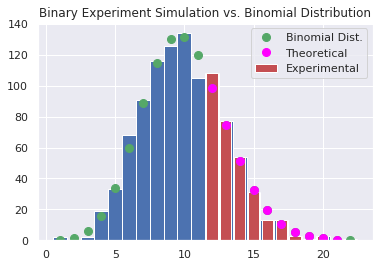

The experimental probability of n successes greater than or equal to 12 is 0.303
The theoretical probability of n successes greater than or equal to 12 is 0.297


In [131]:
# Define parameters to use in the comparison of simulated vs. theoretical number of successes
n = 12
compare = 'greater than or equal'
n_exp = 1000
n_trials = 100
p_success = 0.1
# Run the experiment
compare_n_successes(n_to_compare=n, 
                    comparison=compare, 
                    experiments=n_exp, 
                    trials=n_trials, 
                    success=p_success)

### **Learning objective 3:** Simulate an experiment to find the probability associated with the number of trials to reach the first success and compare with the result computed using the geometric distribution.
**Step 1:** Write a function to simulate a geometric experiment that records the number of trials to reach the first success.

In [6]:
# Define a new experiment that simply counts the number of trials to reach the first success
def geometric_experiment(success=0.05):
  # Initialize a count variable
  count = 1
  # Loop through conducting Bernouilli trials until reaching success
  while True:
    outcome = bernouilli_trial(prob_of_success=success)
    # If the outcome is a success, break out of the loop and return the count
    if outcome == 'success':
      break
    # Otherwise add one to the count
    else:
      count += 1
  # Return the final count
  return count

# Run the new function to test
geometric_experiment()

16

**Step 2:** Write a function to run multiple geometric experiments and record the results of each.

In [7]:
# Define a function to perform multiple geometric experiments
def multiple_geometric(experiments=10, success=0.1):
  # Initialize a list to hold the count of number of trials to reach success
  count_to_success = []
  # Loop through running each experiment and recording the result
  for i in range(experiments):
    count_to_success.append(geometric_experiment(success=success))
  # Return the results
  return count_to_success

# Run the new function to test
multiple_geometric()

[11, 4, 3, 5, 1, 2, 1, 50, 7, 8]

**Step 3:** Plot up a histogram of the result of running multiple geometric experiments and compare with the theoretical result computed using the geometric distribution.

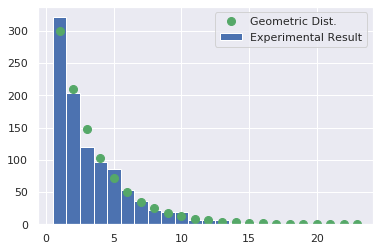

In [111]:
# Define parameters for the number of experiments to run and probability of success
n_experiments = 1000
p_success = 0.3
# Run geometric experiments with these parameters
count_to_success = multiple_geometric(experiments=n_experiments, 
                                      success=p_success)
# Generate x-values to use in calculating a theoretical geometric distribution
x = np.arange(1, np.max(count_to_success)+1)
# Use the x-values to define bins to be used for a histogram of experimental data
bin_edges = x - 0.5
# Compute and plot a histogram of experimental results (blue bars)
plt.hist(count_to_success, bins=bin_edges, label='Experimental Result')
# Plot the theoretical result from a geometric distribution (green dots)
plt.plot(x, stats.geom.pmf(x, p_success)*n_experiments, 'go', ms=8, label='Geometric Dist.')
plt.legend()
plt.show()

**Step 4:** Compare the result of running multiple binary experiments with the theoretical result computed using the geometric distribution for a specified range of values.

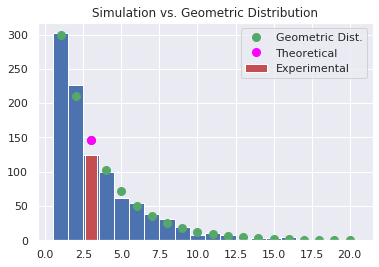

The experimental probability of n trials to successe equal to 3 is 0.125
The theoretical probability of n trials to successe equal to 3 is 0.147


In [122]:
# Write a function to compare an experimental result for some number of successes
# with the theoretical result from a binomial distribution
def compare_trials_to_success(n_to_compare=3, comparison='equal', experiments=1000, success=0.3):
  # Run geometric experiments
  count_to_success = multiple_geometric(experiments=experiments, 
                                        success=success)
  # Generate x-values to use in calculating a theoretical geometric distribution
  x = np.arange(1, np.max(count_to_success)+1)
  # Use the x-values to define bins to be used for a histogram of experimental data
  bin_edges = np.append(x-0.5, x[-1]+0.5)
  # Compute and plot a histogram of experimental results (blue bars)
  hist = plt.hist(count_to_success, bins=bin_edges)
  # Plot the theoretical result from a binomial distribution (green dots)
  theoretical_result = stats.geom.pmf(x, success)
  plt.plot(x, theoretical_result*experiments, 'go', ms=8, label='Geometric Dist.')

  # Check if the number requested for comparison exists in the array of x-values
  if n_to_compare not in list(x):
    print('The number of successes for comparison is not within the experimental results.')
    print(f'Try again with one of these numbers:{x}')
    return
  # Check to see if the type of comparison requested is valid
  compare_options = ['equal', 'less than or equal', 'greater than or equal']
  if comparison not in compare_options:
    print(f'{comparison} is not an option for comparison')
    print(f'Try again with one of these:{compare_options}')
    return
  # Extract the array of experimental counts
  experimental_counts = hist[0]
  # Extract the indices for comparison
  if comparison == 'equal':
    ind = (x == n_to_compare).nonzero()[0]
  if comparison == 'less than or equal':
    ind = (x <= n_to_compare).nonzero()[0]
  if comparison == 'greater than or equal':
    ind = (x >= n_to_compare).nonzero()[0][:-1]
  # Compute the fraction of counts (probability) for that value(s) in the experiment
  experimental_probability = np.sum(experimental_counts[ind])/np.sum(experimental_counts)
  theoretical_probability = np.sum(theoretical_result[ind])
  # Extract the x-values for the comparison
  
  # Plot the experimental and theoretical comparison
  plt.bar(x[ind], experimental_counts[ind], color='r', label='Experimental')
  plt.plot(x[ind], theoretical_result[ind]*experiments, color='magenta', marker='o', ms=8, ls='None', label='Theoretical')
  plt.legend()
  plt.title('Simulation vs. Geometric Distribution')
  plt.show()
    # Compute the theoretical probability of that exact result using the binomial distribution
  print(f'The experimental probability of n trials to successe {comparison} to {n_to_compare} is {experimental_probability:.3f}') 
  print(f'The theoretical probability of n trials to successe {comparison} to {n_to_compare} is {theoretical_probability:.3f}')

# Run the new function to test
compare_trials_to_success()

**Step 5:** Try running the comparison for different input parameters.

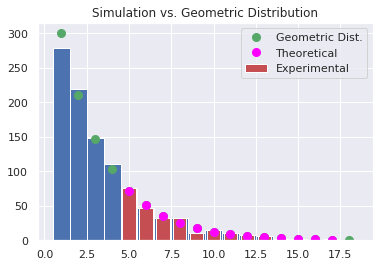

The experimental probability of n trials to successe greater than or equal to 5 is 0.243
The theoretical probability of n trials to successe greater than or equal to 5 is 0.238


In [130]:
# Define parameters to use in the comparison of simulated and theoretical number of trials to reach first success
n = 5
compare = 'greater than or equal'
n_exp = 1000
p_success = 0.3
# Run the comparison
compare_trials_to_success(n_to_compare=n, 
                          comparison=compare, 
                          experiments=n_exp, 
                          success=p_success)

### **Learning objective 4:** Simulate the probability of recording a given number of events in an interval or region and compare the result with the probability computed directly using the Poisson distribution.
**Step 1:** Write a function to simulate a Poisson experiment that records the number of successes over an interval.

In [36]:
# Define a function to count the number of successful trials in an interval (region)
# In terms of parameter definitions, let's say the event rate lambda is defined for some "baseline" interval or region, then:
### "subinterval_size" is the fraction of that baseline interval over which to conduct each trial
### "n_subintervals" is the number of subintervals (trials) to conduct
### "poisson_lambda" is the average number of successes or event rate over that baseline interval
def poisson_experiment(subinterval_size=1/60, n_subintervals=60, poisson_lambda=10):
  # Calculate the probability of success for any given subinterval 
  # by multiplying the average number of successes per interval by the number of subintervals
  prob_per_subinterval = poisson_lambda*subinterval_size
  # Run a binary experiment recording outcomes for each trial
  outcomes = binary_experiment(trials=n_subintervals, 
                               p_of_success=prob_per_subinterval)
  # Count the number of successful outcomes
  n_success = len([s for s in outcomes if s == 'success'])
  # Return the result
  return n_success

# Run the new function to test
poisson_experiment()

12

**Step 2:** Write a function to run multiple Poisson experiments and record the results of each.

In [37]:
# Define a function to run multiple Poisson experiments
def multiple_poisson(experiments=10, subinterval_size=1/60, n_subintervals=60, poisson_lambda=10):
  # Initialize a list to hold the result of each experiment
  n_successes = []
  # Loop through running each experiment and recording the result
  for i in range(experiments):
    n_success = poisson_experiment(subinterval_size=subinterval_size, 
                                   n_subintervals=n_subintervals, 
                                   poisson_lambda=poisson_lambda)
    # Append each result to the list
    n_successes.append(n_success)
  # Return the result
  return n_successes

# Run the new function to test
multiple_poisson()

[16, 14, 14, 9, 9, 4, 12, 9, 12, 8]

**Step 3:** Plot up a histogram of the result of running multiple Poisson experiments and compare with the theoretical result computed using the Poisson distribution.

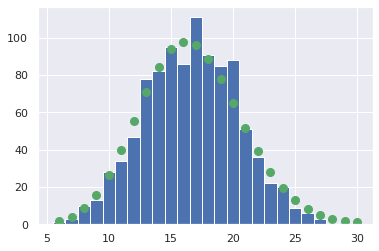

In [35]:
# Define parameters for the number of experiments to run, number of subintervals and successes per interval
n_experiments=1000
sub_size=1/60 
n_subs=60
p_lambda=10
# Run the experiments and record the result
n_successes = multiple_poisson(experiments=n_experiments, 
                               subinterval_size=sub_size, 
                               n_subintervals=n_subs, 
                               poisson_lambda=p_lambda)

# Generate x-values to use in calculating a theoretical Poisson distribution
x = np.arange(np.min(n_successes), np.max(n_successes)+1)
# Use the x-values to define bins to be used for a histogram of experimental data
bin_edges = x - 0.5
# Compute and plot a histogram of experimental results (blue bars)
plt.hist(n_successes, bins=bin_edges)
# Plot the theoretical result from a Poisson distribution (green dots)
plt.plot(x, stats.poisson.pmf(x, n_subs*sub_size*p_lambda)*n_experiments, 'go', ms=8, label='Poisson Dist.')
plt.show()

**Step 4:** Compare the result of running multiple Poisson experiments with the theoretical result computed using the Poisson distribution for a specified range of values.

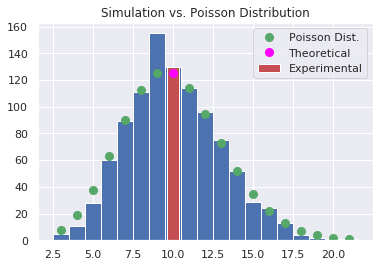

The experimental probability of n events in the interval being equal to 10 is 0.130
The theoretical probability of n events in the interval being equal to 10 is 0.125


In [128]:
# Write a function to compare an experimental result for some number of successes
# with the theoretical result from a binomial distribution
def compare_n_over_interval(n_to_compare=10, comparison='equal', experiments=1000, 
                               subinterval_size=1/60, 
                               n_subintervals=60, 
                               poisson_lambda=10):
  # Run the experiments
  n_successes = multiple_poisson(experiments=experiments, 
                               subinterval_size=subinterval_size, 
                               n_subintervals=n_subintervals, 
                               poisson_lambda=poisson_lambda)
  # Generate x-values to use in calculating a theoretical geometric distribution
  x = np.arange(np.min(n_successes), np.max(n_successes)+1)
  # Use the x-values to define bins to be used for a histogram of experimental data
  bin_edges = np.append(x-0.5, x[-1]+0.5)
  # Compute and plot a histogram of experimental results (blue bars)
  hist = plt.hist(n_successes, bins=bin_edges)
  # Plot the theoretical result from a binomial distribution (green dots)
  theoretical_result = stats.poisson.pmf(x, n_subintervals*subinterval_size*poisson_lambda)
  plt.plot(x, theoretical_result*experiments, 'go', ms=8, label='Poisson Dist.')

  # Check if the number requested for comparison exists in the array of x-values
  if n_to_compare not in list(x):
    print('The number of successes for comparison is not within the experimental results.')
    print(f'Try again with one of these numbers:{x}')
    return
  # Check to see if the type of comparison requested is valid
  compare_options = ['equal', 'less than or equal', 'greater than or equal']
  if comparison not in compare_options:
    print(f'{comparison} is not an option for comparison')
    print(f'Try again with one of these:{compare_options}')
    return
  # Extract the array of experimental counts
  experimental_counts = hist[0]
  # Extract the indices for comparison
  if comparison == 'equal':
    ind = (x == n_to_compare).nonzero()[0]
  if comparison == 'less than or equal':
    ind = (x <= n_to_compare).nonzero()[0]
  if comparison == 'greater than or equal':
    ind = (x >= n_to_compare).nonzero()[0][:-1]
  # Compute the fraction of counts (probability) for that value(s) in the experiment
  experimental_probability = np.sum(experimental_counts[ind])/np.sum(experimental_counts)
  theoretical_probability = np.sum(theoretical_result[ind])
  # Extract the x-values for the comparison
  
  # Plot the experimental and theoretical comparison
  plt.bar(x[ind], experimental_counts[ind], color='r', label='Experimental')
  plt.plot(x[ind], theoretical_result[ind]*experiments, color='magenta', marker='o', ms=8, ls='None', label='Theoretical')
  plt.legend()
  plt.title('Simulation vs. Poisson Distribution')
  plt.show()
    # Compute the theoretical probability of that exact result using the binomial distribution
  print(f'The experimental probability of n events in the interval being {comparison} to {n_to_compare} is {experimental_probability:.3f}') 
  print(f'The theoretical probability of n events in the interval being {comparison} to {n_to_compare} is {theoretical_probability:.3f}')

  return

# Run the new function to test
compare_n_over_interval()

**Step 5:** Try running the comparison for different input parameters.

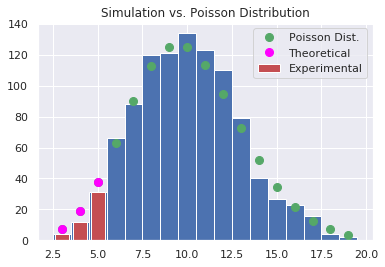

The experimental probability of n events in the interval being less than or equal to 5 is 0.047
The theoretical probability of n events in the interval being less than or equal to 5 is 0.064


In [129]:
# Define parameters to use in the comparison of simulated and theoretical number of events per interval
n = 5
compare = 'less than or equal'
n_exp = 1000
sub_size = 1/60
n_subs = 60
p_lambda = 10
# Run the comparison
compare_n_over_interval(n_to_compare=n, 
                        comparison=compare, 
                        experiments=n_exp, 
                        subinterval_size=sub_size, 
                        n_subintervals=n_subs, 
                        poisson_lambda=p_lambda)